# CAPSTONE PROJECT - NLP

DOMAIN: Automatic Ticketing System.

• CONTEXT: One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organisations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organisations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

• Business Domain Value: In the support process, incoming incidents are analysed and assessed by organisations support teams to fulfill the request. In many organisations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

PROJECT DESCRIPTION:
In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.

# Pre-Processing, Data Visualisation and EDA

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Exploring the given Data files and Understanding the Structure of data

In [2]:
df1 = pd.read_excel('input_data.xlsx')

In [3]:
print(df1.shape)

(8500, 4)


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [5]:
df1['Assignment group'].nunique()

74

In [6]:
df1.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [7]:
df1.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [8]:
df1.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [9]:
df1.groupby('Assignment group').count().T / df1['Assignment group'].count()

Assignment group,GRP_0,GRP_1,GRP_10,GRP_11,GRP_12,GRP_13,GRP_14,GRP_15,GRP_16,GRP_17,...,GRP_67,GRP_68,GRP_69,GRP_7,GRP_70,GRP_71,GRP_72,GRP_73,GRP_8,GRP_9
Short description,0.466941,0.003647,0.016471,0.003529,0.030235,0.017059,0.013882,0.004588,0.01,0.009529,...,0.000118,0.000353,0.000235,0.008,0.000118,0.000235,0.000235,0.000118,0.077765,0.029647
Description,0.467647,0.003647,0.016471,0.003529,0.030235,0.017059,0.013882,0.004588,0.01,0.009529,...,0.000118,0.000353,0.000235,0.008,0.000118,0.000235,0.000235,0.000118,0.077765,0.029647
Caller,0.467765,0.003647,0.016471,0.003529,0.030235,0.017059,0.013882,0.004588,0.01,0.009529,...,0.000118,0.000353,0.000235,0.008,0.000118,0.000235,0.000235,0.000118,0.077765,0.029647


# Missing points in data  and Finding inconsistencies in the data

In [10]:
df1.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [11]:
# we need to check for missing values and drop them
df1 = df1.dropna(how='any',axis=0)

In [12]:
df1.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [13]:
# Let's check for duplicates

In [14]:
dupe_df = df1[df1.duplicated()]


In [15]:
dupe_df

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [16]:
# Let's remove the duplicates

In [17]:
df1 = df1.drop_duplicates(['Short description', 'Description', 'Assignment group'])

In [18]:
df1.shape

(7903, 4)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  7903 non-null   object
 1   Description        7903 non-null   object
 2   Caller             7903 non-null   object
 3   Assignment group   7903 non-null   object
dtypes: object(4)
memory usage: 308.7+ KB


In [20]:
df1.describe()

,Short description,Description,Caller,Assignment group
count,7903,7903,7903,7903
unique,7480,7812,2762,74
top,erp access issue,the,bpctwhsn kzqsbmtp,GRP_0
freq,17,43,788,3424


In [21]:
# we can see the caller feature has indifferent values. we need to drop the 'caller' feature

In [22]:
df1 = df1.drop (columns='Caller', axis = 1)
df1

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0
...,...,...,...
8495,emails not coming in from zz mail,_x000D_\n_x000D_\nreceived from: avglmrts.vhqm...,GRP_29
8496,telephony_software issue,telephony_software issue,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,GRP_62


# Visualising different patterns

In [23]:
df_group = df1.groupby(['Assignment group']).size().reset_index(name='counts')

In [24]:
df_group

,Assignment group,counts
0,GRP_0,3424
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,256
...,...,...
69,GRP_71,2
70,GRP_72,2
71,GRP_73,1
72,GRP_8,645


In [25]:
# Incident Distribution

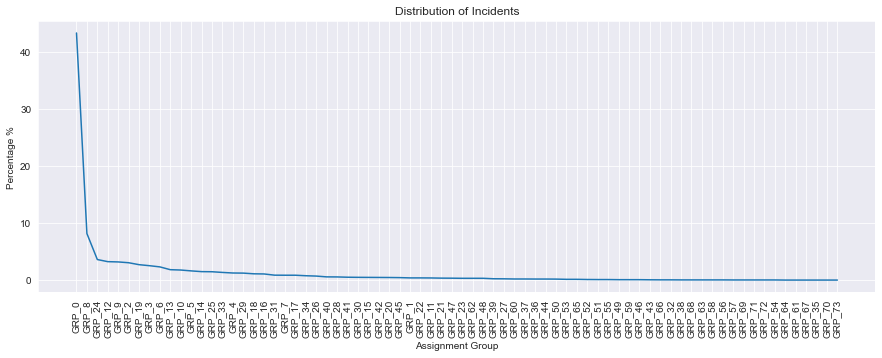

In [26]:
sns.set_style("darkgrid")

df_group["count_perc"] = round((df_group["counts"]/df1.shape[0])*100,2)
df_group.sort_values(["count_perc"], axis=0, ascending=False, inplace=True)

plt.subplots(figsize = (15,5)) 
plt.plot(df_group["Assignment group"], df_group["count_perc"]) 
plt.xlabel('Assignment Group') 
plt.ylabel('Percentage %') 
plt.xticks(rotation=90)
plt.title('Distribution of Incidents') 
plt.show() 

In [27]:
print("The Description")
print("MAX str length          MIN str length ")
print(df1['Description'].str.len().max(), "                        ", df1['Description'].str.len().min() )

The Description
MAX str length          MIN str length 
14441                          1


In [28]:
print("The Short description")
print("MAX str length          MIN str length ")
print(df1['Short description'].str.len().max(), "                        ", df1['Short description'].str.len().min() )

The Short description
MAX str length          MIN str length 
159                          1


In [29]:
# Let's combine the Short description & description 

In [30]:
df1["Combined Description"] = df1["Short description"].map(str) + ' ' + df1["Description"].map(str)

In [31]:
df1.head(10)

,Short description,Description,Assignment group,Combined Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,GRP_0,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in to engineering tool and skype...
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,event: critical:HostName_221.company.com the v...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,ticket_no1550391- employment status - new non-...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,unable to disable add ins on outlook unable to...
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,ticket update on inplant_874773 ticket update ...


In [32]:
df1.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7903 non-null   object
 1   Description           7903 non-null   object
 2   Assignment group      7903 non-null   object
 3   Combined Description  7903 non-null   object
dtypes: object(4)
memory usage: 308.7+ KB


In [33]:
print(df1.shape)

(7903, 4)


In [34]:
df1.describe()

,Short description,Description,Assignment group,Combined Description
count,7903,7903,7903,7903
unique,7480,7812,74,7887
top,erp access issue,the,GRP_0,uacyltoe hxgaycze uacyltoe hxgaycze
freq,17,43,3424,3


In [35]:
print("The Combined Description")
print("MAX str length          MIN str length ")
print(df1['Combined Description'].str.len().max(), "                        ", df1['Combined Description'].str.len().min() )



The Combined Description
MAX str length          MIN str length 
14544                          3


In [36]:
# we have to delete the "duplicates words" in Combined Description column

In [37]:
df1["Combined Description"] = df1["Combined Description"].apply(lambda x: ' '.join(pd.unique(x.split())))

In [38]:
df1.head(10)

,Short description,Description,Assignment group,Combined Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_ received from: hmjdrvpb.komuay...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_ received from: eylq...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page
4,skype error,skype error,GRP_0,skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in engineering tool and skype
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,event: critical:HostName_221.company.com the v...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,ticket_no1550391- employment status - new non-...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,unable to disable add ins on outlook
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,ticket update on inplant_874773


In [39]:
df1.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7903 non-null   object
 1   Description           7903 non-null   object
 2   Assignment group      7903 non-null   object
 3   Combined Description  7903 non-null   object
dtypes: object(4)
memory usage: 308.7+ KB


In [40]:
print(df1.shape)

(7903, 4)


In [41]:
df1.describe()

,Short description,Description,Assignment group,Combined Description
count,7903,7903,7903,7903
unique,7480,7812,74,7819
top,erp access issue,the,GRP_0,unable to connect vpn
freq,17,43,3424,5


In [42]:
print("The Combined Description")
print("MAX str length          MIN str length ")
print(df1['Combined Description'].str.len().max(), "                        ", df1['Combined Description'].str.len().min() )

The Combined Description
MAX str length          MIN str length 
8753                          1


Short description with lesser string length captures and highlights the incident effectively

Our preprocessing and model buidling has to be based on Combined Description

# Visualising different text features

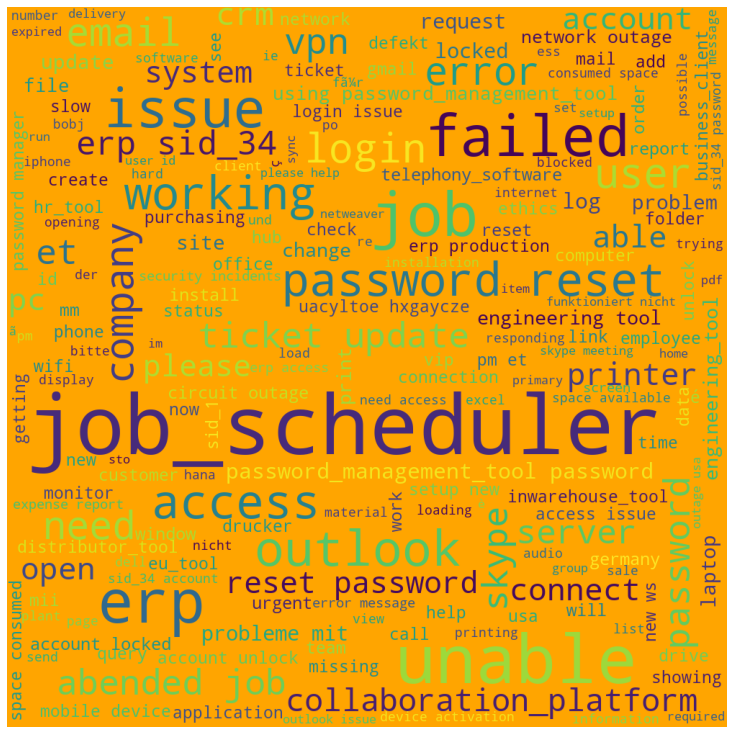

In [43]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1['Short description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='orange', 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [44]:
# Combined Description

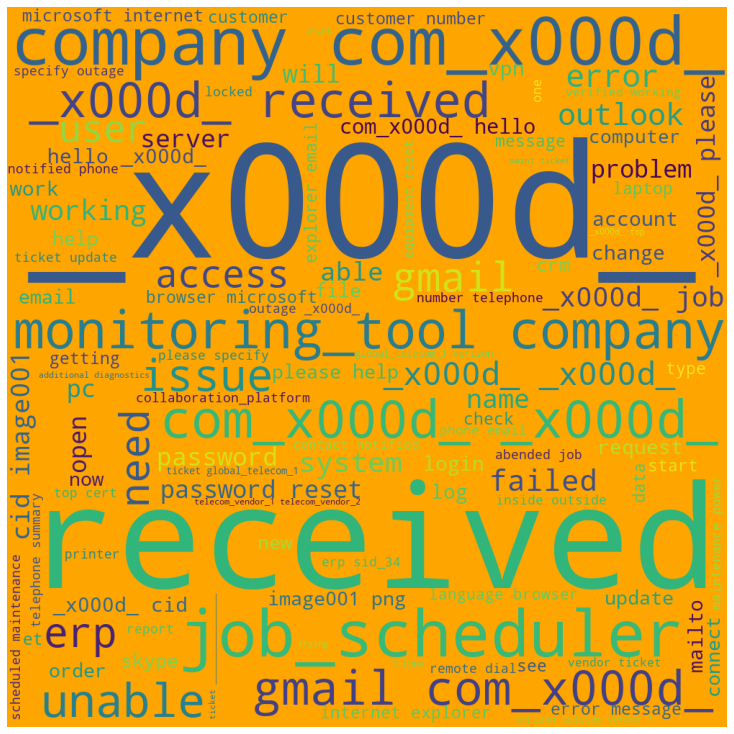

In [45]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1['Combined Description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='orange', 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

The frequently used words are higher in the latter than the former

In [46]:
# Let's try Bi-Gram Frequency for the "Short Description"

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df1["Short description"])
frequencies = sum(sparse_matrix).toarray()[0]
bigram_df1 = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

/opt/homebrew/Caskroom/miniforge/base/envs/opencv2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
bigram_df1.sort_values(by = "frequency",ascending=False).head(10)

,frequency
in job_scheduler,937
job_scheduler at,785
failed in,785
unable to,600
at 09,309
at 10,298
password reset,272
not working,252
is not,201
is down,182


<AxesSubplot:title={'center':'Top frequent Bi-Grams'}, xlabel='Frequency', ylabel='Terms'>

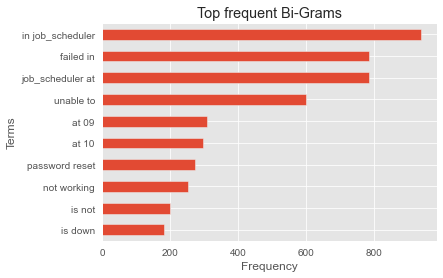

In [50]:
plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
Topbigram = bigram_df1["frequency"].sort_values(ascending = False).head(10)
Topbigram.head(10).sort_values(ascending = True).plot(kind="barh",title = "Top frequent Bi-Grams")

In [51]:
# Combined Description

In [52]:
word_vectorizer_c = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix_c = word_vectorizer_c.fit_transform(df1["Combined Description"])
freqc = sum(sparse_matrix_c).toarray()[0]
bigram_df1_c = pd.DataFrame(freqc, index=word_vectorizer_c.get_feature_names(), columns=['frequency'])

/opt/homebrew/Caskroom/miniforge/base/envs/opencv2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
bigram_df1_c.sort_values(by = "frequency",ascending=False).head(10)

,frequency
received from,2225
gmail com,1292
company com_x000d_,990
in job_scheduler,944
from monitoring_tool,939
com_x000d_ _x000d_,939
monitoring_tool company,939
_x000d_ received,813
gmail com_x000d_,804
failed in,790


<AxesSubplot:title={'center':'Top Frequent Bi Grams'}, xlabel='Frequency', ylabel='Terms'>

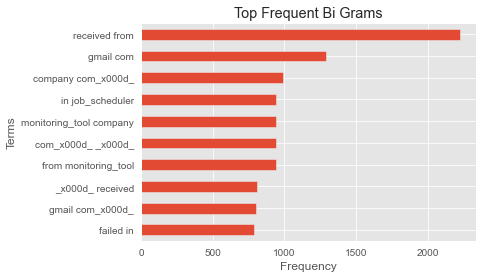

In [54]:
plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
Topbigram_c = bigram_df1_c["frequency"].sort_values(ascending = False).head(10)
Topbigram_c.head(10).sort_values(ascending = True).plot(kind="barh",title = "Top Frequent Bi Grams")

The frequency of Bi-grams generated in "Combined Description" is significantly higher than of Short Description

# Text preprocessing

In [55]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
stop = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sriramanag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sriramanag/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sriramanag/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sriramanag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

In [57]:
def lemmatize_sentence(sentence):

    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    #tuple of (token, wordnet_tag)

    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

/opt/homebrew/Caskroom/miniforge/base/envs/opencv2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Short description', ylabel='Density'>

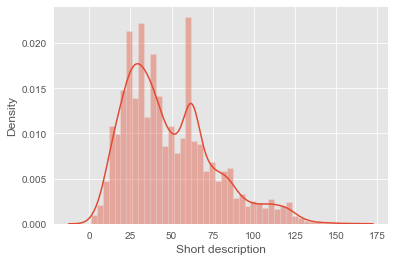

In [58]:
sns.distplot(df1['Short description'].str.len())

/opt/homebrew/Caskroom/miniforge/base/envs/opencv2/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Combined Description', ylabel='Density'>

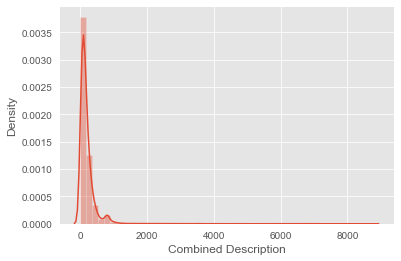

In [59]:
sns.distplot(df1['Combined Description'].str.len())

# Creating word vocabulary from the corpus of report text data
# Creating tokens as required

In [60]:
# Wordcloud - Short Description

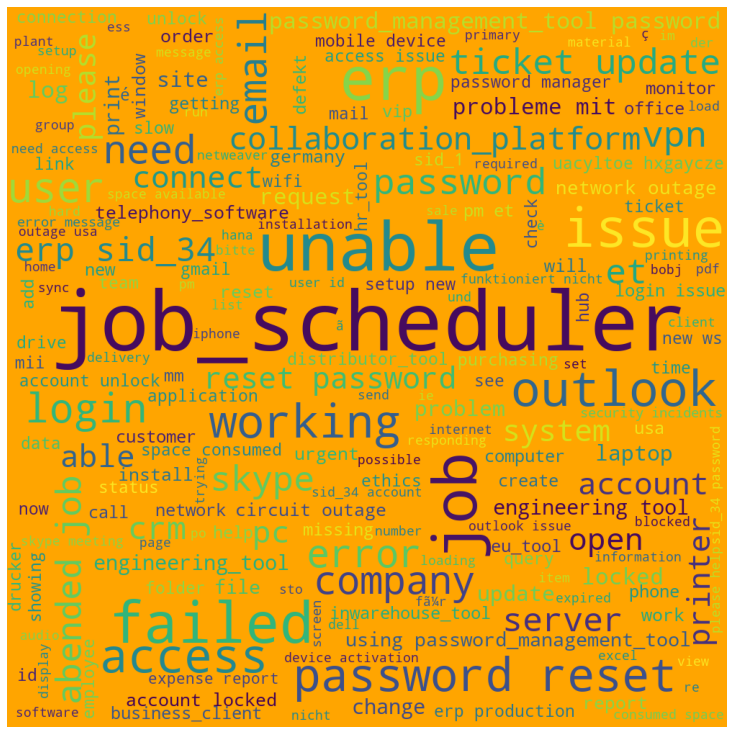

In [61]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1['Short description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='orange', 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [62]:
# Wordcloud - Combined Description

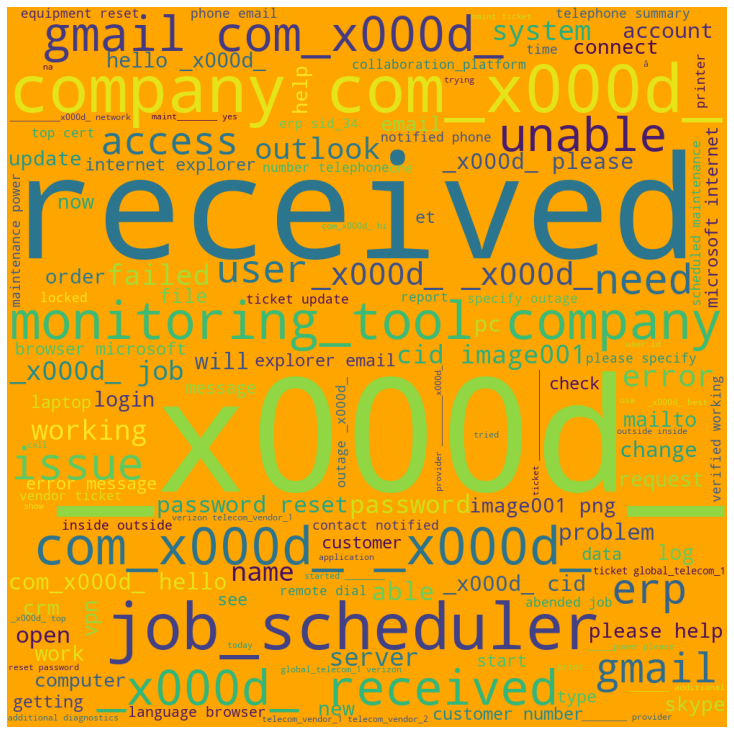

In [63]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1['Combined Description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='orange', 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [64]:
# We have to create a column to mark records with GRP_0 and non GRP_0=>GRP_X
# Visualization for GRP_0 and GRP_X

In [65]:
df1['GRP_MOD'] = df1['Assignment group'].apply(lambda x: 'GRP_X' if x != 'GRP_0' else x)

In [66]:
def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='orange',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

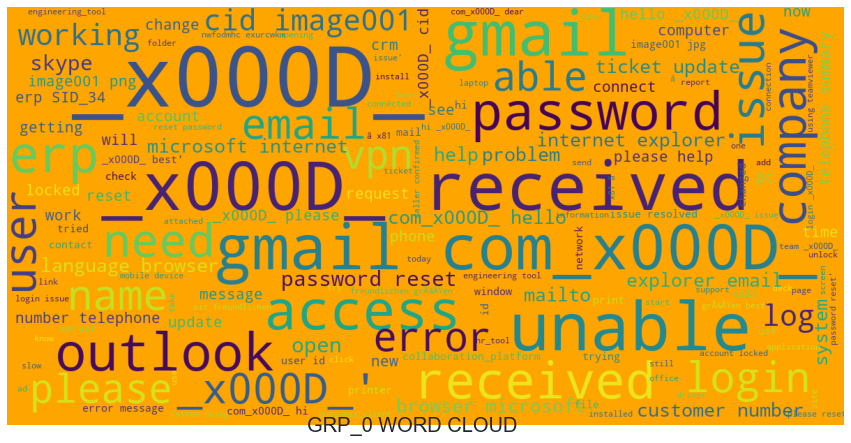

In [67]:
TextStr = df1['Combined Description'][df1['GRP_MOD'].isin(["GRP_0"])].tolist()
show_wordcloud(TextStr, "GRP_0 WORD CLOUD")

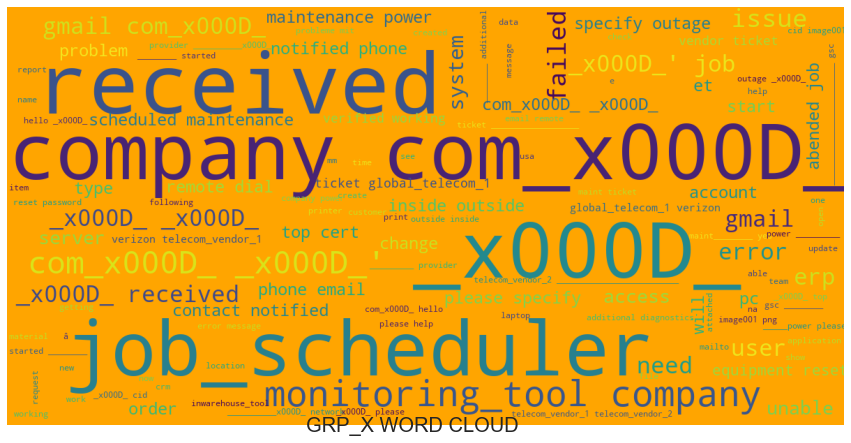

In [68]:
TextStr = df1['Combined Description'][df1['GRP_MOD'].isin(["GRP_X"])].tolist()
show_wordcloud(TextStr, "GRP_X WORD CLOUD")